In [4]:
import pandas as pd
data = pd.read_csv("../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV", data = data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

# El modelo lineal predictivo sería Sales = 7.0032 + 0.047*TV

In [6]:
# Calculo los p valores (deben ser pequeños para que me digan que mis parámetros sin significativos)

lm.pvalues


Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p valores son tan pequeños que podemos decir que los parámetros son super significativos

In [7]:
# Calculo el valor de R2 (R cuadrado)
lm.rsquared

0.611875050850071

In [8]:
lm.rsquared_adj

0.6099148238341623

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        09:08:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- F-stadistico es grande
- p valor asociado es muy chico
- los parámetros son todos significantes y no nulos
- Los t valores para los parámetros tienen los intervalores de confianza desde el 0.025 y 0.975. Intervalos no contienen el cero, por lo que no son nulos.

Por lo tanto, la regresión que hicimos es buena y existe una relación lineal entre X e Y

In [10]:
# predecir valores a futuro. predict recibe un dataframe, por lo que creo un dataframe con 
# una columna del detaframe.
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

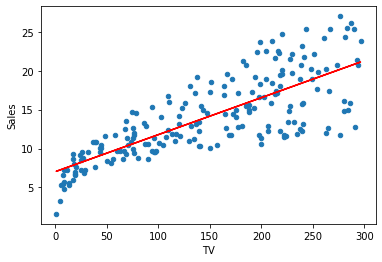

In [11]:
import matplotlib.pyplot as plt
data.plot(kind = "scatter", x = "TV", y = "Sales")

# ploteo el gráfico. plot recibe valores de X, valores de Y, color, etc..
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red")

In [12]:
# Calcularemos el error estandar residual
import numpy as np

# Agrego una nueva columna con los valores predecidos por el modelo
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

# Agrego la columna de los Errores estandares residuales (diferencias cuadradas entre valores reales y predecidos)
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

# Suma de los cuadrados de las diferencias
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [13]:

# Calculo el error estandar residual
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [14]:
# 3.25 es la desviación típica del promedio
# Para ver qué tan significativo es este valor respecto del promedio de las ventas, hacemos:
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [15]:
# Finalmente, para calcular el % de error:
error = RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

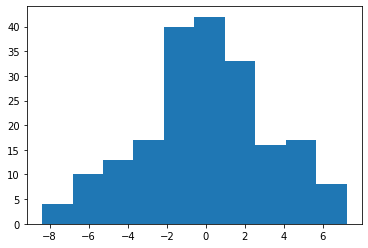

In [16]:
# Tengo un error cercano al 23%. Esto significa que mi modelo no puede explicar el 23% de los datos.

# Ahora tengo que ver la distribución de los errores, los cuales deben distribuir normal:
plt.hist((data["Sales"]-data["sales_pred"]))

# Esta predicción no es tan buena:
- Error es del 23%
- R2 se puede mejorar un poco

Por lo tanto, dado el dataset (que tiene más canales de información; Radio y Newspapes), que nos podrían contribuir a elaborar un modelo lineal de más de una variable predictoria.

# Vamos a hacer un modelo lineal con mayor cantidad de parámetros
- Sales ~ TV
- Sales ~ Radio
- ...
- Sales ~ TV+Newspaper

2**k - 1 modelos distintos, siendo k la cantidad de parámetros (obviamente no incluye Sales, la variable independiente). 

 Cada nueva variable debería aumentar el R2 ajustado.
 
 Enfoque constructivo es ir sumando parámetros en función de que aporten a aumentar el R2 y menor error residual de suma de los cuadrados, en todo otro caso no se incluye en el modelo.
 
 Enfoque destructivo es partir con todos e ir quitando.
 
 Python nos permite implementar esto de forma rápida, pero lo vamos a hacer de forma manual.

In [17]:
#añadir el newspaper al modelo existente

# EL metodo fit debe ir
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [18]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [19]:
# Todos los p values siguen siendo no nulos y muy pequeños

In [20]:
# Sales = lm2.params[0] + lm2.params[1]*TV + lm2.params[2]*Newspaper 

lm2.rsquared
lm2.rsquared_adj

# Nuestro R2 aumentó en relación el modelo que incluía solamente la TV

0.6422399150864777

In [21]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [22]:
# Voy a calcular el SSD, que es la suma de los RSE
SSD = sum((data["Sales"]-sales_pred)**2)
SSD

1918.5618118968275

In [25]:
# número de varibles predictoras es 2, por lo que debemos restar 3 (2 por las variables predictoras - 1)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [26]:
RSE

3.1207198602528856

In [27]:
# bajamos de 3.25 a 3.12 con respecto al modelo solo con TV, por lo que estamos mejor.
error = RSE / sales_m

In [28]:
error
# el error baja también, ahora nuestro modelo deja de explicar el 22% de los datos, antes era el23%

0.2225508903728212

In [29]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           3.95e-45
Time:                        09:08:18   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# podemos ver en el summary que todo baja:
# los pvalues bajan
# el F estadístico es más bajo
# el R2 y R2 ajustado aumenta

# Conclusión, añadir periódico aumenta, pero tampoco taaaanto. Vamos a agregar la Radio

In [31]:
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [32]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        09:08:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Nuestro F estadístico (pvalor) es muuuy pequeño (más pequeño que el anterior)
# el coeficiente de la radio es muy grande
# R2 ha aumentado muchísimo

sales_pred = lm3.predict(data[["TV","Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.681360912508001

In [34]:
error = RSE/sales_m
error

0.11990450436855059

In [35]:
# Wow, este nuevo modelo deja de explicar solo el 11% de los datos
# Probemos con el modelo con los 3 parámetros.

lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [36]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        09:08:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# agregando newspaper no nos mejora la situación:

# Mismo R2 ajustado (0.897)
# F estadístico aumentó (e**-98 -> e**-96)
# El coeficiente de newspaper es negativo y casi cero.
# P valor de Newspaper tiene un rango que pasa por cero y tiene un P value (P>|t|) súmamente alto. 
# Con mucha probabilidad el parámetro que acompaña a newspaper pasa por cero, 
# poruqe el intervalo de confianza pasa por cero

# Este es el caso típico en que los valores de R2 son similares
# El p valor es tan alto que podemos aceptar la hipóteiss nula

# Veamos el error

sales_pred = lm4.predict(data[["TV","Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))
RSE

1.6855103734147439

In [38]:
error = RSE/sales_m
error

0.12020041885646236

In [39]:
# este modelo deja de explicar el 12% de los datos, a diferencia del 11%.
# Esto significa que agregar el Newspaper nos resta en el modelo en relación a Sales ~ TV+Radio


# Multicolinealidad
 Es la razón de que nuestro modelo se haya comportado peor con el periódico.
 Hace referencia a la correlación entre variables predictoras del modelo.
 
 La correlación entre Radio y Newspaper:
 

In [40]:
data.corr()

,TV,Radio,Newspaper,Sales,sales_pred,RSE
TV,1.000000,0.054809,0.056648,0.782224,1.000000,0.490091
Radio,0.054809,1.000000,0.354104,0.576223,0.054809,0.079114
Newspaper,0.056648,0.354104,1.000000,0.228299,0.056648,0.056557
Sales,0.782224,0.576223,0.228299,1.000000,0.782224,0.341942
sales_pred,1.000000,0.054809,0.056648,0.782224,1.000000,0.490091
RSE,0.490091,0.079114,0.056557,0.341942,0.490091,1.000000


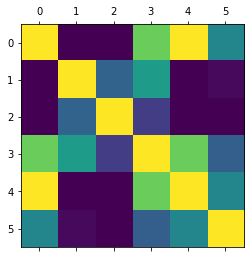

In [41]:
plt.matshow(data.corr())

Radio y newspaper tienen una correlación alta (3.53, valor alto). Esta correlación entre las variables predictoras, hace que una interactua negativamente con la otra.

Una de las dos variables deben eliminarse del modelo.

In [42]:
# Newspapes ~ TV + Radio nos da problemas. Calculamos este modelo lineal y su respectivo R**2 para calcular el 
# VIF = 1/(1-R**2) para todos los modelos:
# Newspapes ~ TV + Radio
# TV ~ newspaper + Radio
# Radio ~ TV + Newspaper

# Si VIF = 1: Las variables no están correlacionadas
# Si VIF < 5 : Las variables tienen una corelación moderara y se pueden quedar en el modelo
# SI VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [43]:
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [44]:
lm_t = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_t = lm_t.rsquared
VIF = 1/(1-rsquared_t)
VIF

1.00461078493965

In [45]:
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [46]:
# El VIF de la radio y de Newspaper tienen casi el mismo VIF, por lo que están altamente correlacionadas.
# Entre quedarnos con uno u otro nos quedamos con Sales~TV y Radio
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        09:08:26   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""